### Goals:

1) Discover users who are accessing our curriculum pages way beyond the end of their codeup time. 

2) What would the dataframe look like? 

3) Use time series method for detecting anomalies, like exponential moving average with %b.

Bonus:

B1) Can you label students who are viewing both the web dev and data science curriculum? 

B2) Can you label students by the program they are in? 

B3) Can you label users by student vs. staff? What are Zach, Maggie, David, and Ryan's ids?

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from acquire import get_the_data
from prepare import prepare_the_data

In [2]:
# Filled nan's with 0 in "other_number" value possibly represents number of users accessing curiculem at a time
# no 0's recorded in data
df = prepare_the_data(get_the_data())
df.head()

,http,person,group,ipaddress
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 4 columns):
http         399195 non-null object
person       399195 non-null int64
group        399195 non-null float64
ipaddress    399195 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [4]:
df.index.sort_values()

DatetimeIndex(['2018-01-26 09:55:03', '2018-01-26 09:56:02',
               '2018-01-26 09:56:05', '2018-01-26 09:56:06',
               '2018-01-26 09:56:24', '2018-01-26 09:56:41',
               '2018-01-26 09:56:46', '2018-01-26 09:56:48',
               '2018-01-26 09:56:59', '2018-01-26 09:58:26',
               ...
               '2019-11-19 10:05:00', '2019-11-19 10:05:53',
               '2019-11-19 10:06:13', '2019-11-19 10:06:21',
               '2019-11-19 10:06:26', '2019-11-19 10:06:28',
               '2019-11-19 10:06:50', '2019-11-19 10:07:03',
               '2019-11-19 10:07:07', '2019-11-19 10:07:45'],
              dtype='datetime64[ns]', name='timestamp', length=399195, freq=None)

## Data from:    2018-01-26 to  2019-11-19  spans about one year

In [5]:
df.isnull().sum()

http         0
person       0
group        0
ipaddress    0
dtype: int64

Massive spike in other_number beginning in augest Why?

one other_number value is tied to about 20 number values

number value is tied to 1~2 other_number values

it is likely that other number represents a group of numbers 

it is further likely that number represents an individual

other number = group of individuals 

number = individual

Fixing column heading in aquire

In [6]:
df.head()

,http,person,group,ipaddress
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [7]:
df['times_accessed'] = 1

In [8]:
df.head()

,http,person,group,ipaddress,times_accessed
timestamp,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,1


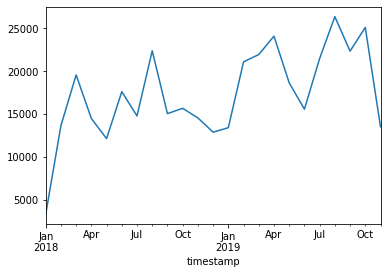

In [9]:
df['times_accessed'].resample('m').sum().plot()

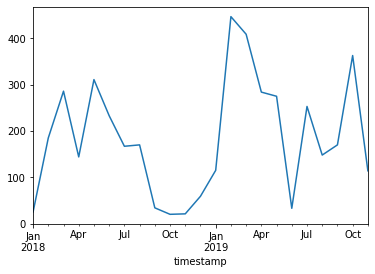

In [10]:
df['times_accessed'][df.person == 1].resample('m').sum().plot()

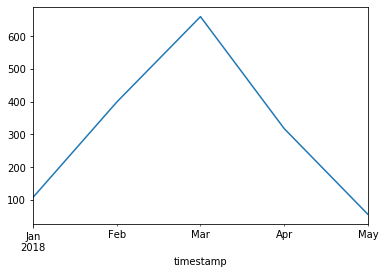

In [11]:
df['times_accessed'][df.person == 2].resample('m').sum().plot()

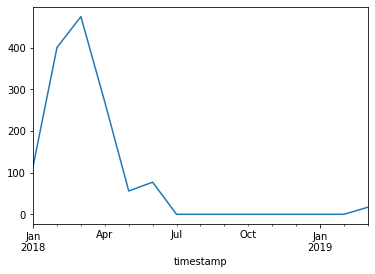

In [12]:
df['times_accessed'][df.person == 6].resample('m').sum().plot()

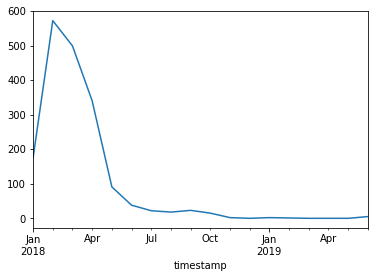

In [13]:
df['times_accessed'][df.person == 7].resample('m').sum().plot()

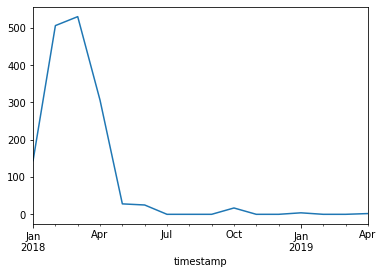

In [14]:
df['times_accessed'][df.person == 3].resample('m').sum().plot()

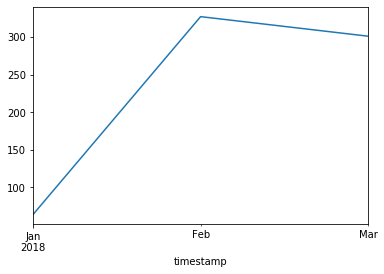

In [15]:
df['times_accessed'][df.person == 4].resample('m').sum().plot()

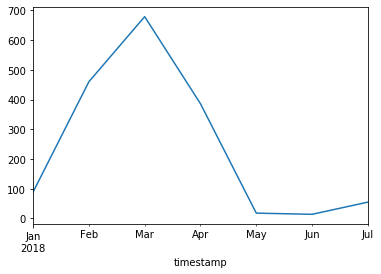

In [16]:
df['times_accessed'][df.person == 5].resample('m').sum().plot()

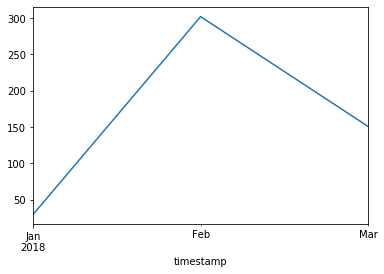

In [17]:
df['times_accessed'][df.person == 8].resample('m').sum().plot()

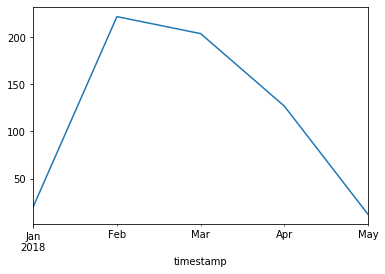

In [18]:
df['times_accessed'][df.person == 9].resample('m').sum().plot()

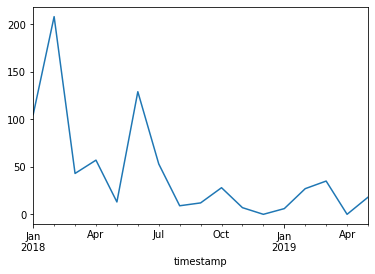

In [19]:
df['times_accessed'][df.person == 10].resample('m').sum().plot()

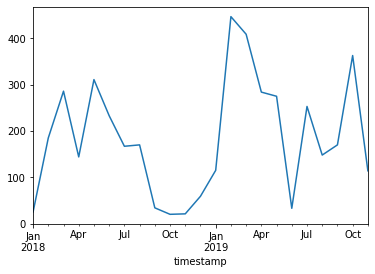

In [20]:
df['times_accessed'][df.person == 1].resample('m').sum().plot()

In [21]:
total = set(df.group)

In [22]:
webdev = list(df.group[df.http == 'javascript-i/bom-and-dom/dom-events'].unique())
[webdev.append(value) for value in list(df.group[df.http == 'javascript-i/introduction/working-with-data-ty...'].unique())]
set(webdev)

{0.0,
 1.0,
 6.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 51.0}

In [23]:
webdev

[22.0,
 21.0,
 14.0,
 1.0,
 0.0,
 23.0,
 18.0,
 24.0,
 16.0,
 25.0,
 15.0,
 26.0,
 6.0,
 17.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 11.0,
 33.0,
 51.0]

In [24]:
other = [group for group in total if group not in webdev]  
other = set(other)

In [25]:
ds = set(df.group[df.http == '1-fundamentals/1.1-intro-to-data-science'])

In [26]:
ds = [group for group in ds if group not in webdev]

In [27]:
ds

[34.0, 7.0]

In [28]:
df.http[df.group==34].tail(100)

timestamp
2019-11-18 15:52:31               8-clustering/4-explore
2019-11-18 15:52:38              7-classification/3-prep
2019-11-18 15:53:12    6-regression/2.0-acquire-and-prep
2019-11-18 15:53:51    9-timeseries/5.1-modeling-lesson1
2019-11-18 15:54:44                  9-timeseries/3-prep
2019-11-18 15:54:44              9-timeseries/1-overview
2019-11-18 15:54:45               9-timeseries/4-explore
2019-11-18 15:56:30    9-timeseries/5.1-modeling-lesson1
2019-11-18 15:56:55    9-timeseries/5.1-modeling-lesson1
2019-11-18 15:57:55               9-timeseries/4-explore
2019-11-18 16:07:23    9-timeseries/5.1-modeling-lesson1
2019-11-18 16:15:35    9-timeseries/5.1-modeling-lesson1
2019-11-18 16:15:55                                    /
2019-11-18 16:16:07    9-timeseries/5.1-modeling-lesson1
2019-11-18 16:18:43    9-timeseries/5.1-modeling-lesson1
2019-11-18 16:21:21               9-timeseries/4-explore
2019-11-18 16:22:28    9-timeseries/5.1-modeling-lesson1
2019-11-18 16:23:12  

In [29]:
df.http[df.group==33].head(100)

timestamp
2019-07-15 15:39:34                                   /
2019-07-15 15:39:48                                 toc
2019-07-15 15:40:29                                quiz
2019-07-15 15:40:33                                   /
2019-07-15 15:40:35                        javascript-i
2019-07-15 15:40:55                              spring
2019-07-15 15:40:58                              java-i
2019-07-15 15:41:06                        javascript-i
2019-07-15 15:41:14                            java-iii
2019-07-15 15:41:18                             java-ii
2019-07-15 15:41:19                                   /
2019-07-15 15:41:59                                   /
2019-07-15 15:42:11                                 toc
2019-07-15 15:42:22                                   /
2019-07-15 15:42:29                                   /
2019-07-15 15:42:44                            html-css
2019-07-15 15:43:11                                   /
2019-07-15 15:44:04                   

In [30]:
#ifull(df.http[df.group==32])

In [31]:
df.person[df.group==34].unique()

array([466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 358, 487])

In [32]:
def ifull(obj):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(obj)




In [33]:
data_science_list = list(set(df.http[df.person==473].unique()))

In [34]:
df.person[df.group==33].unique()

array([433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
       446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
       460, 515, 543])

In [35]:
web_development = list(set(df.http[df.person==435]))

In [36]:
ifull(df.person.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [37]:
person_1 = set(df.http[df.person==1])

In [38]:
data_science_list = set(df.http[df.person==473])

web_development = set(df.http[df.person==435])

ds_score = 0

wd_score = 0

person = 1

person_1 = set(df.http[df.person==1])

group_number = set(df.group[df.person==1].unique())

for http in data_science_list:
    if http in person_1:
        ds_score += 1
        
for http in web_development:
    if http in person_1:
        wd_score += 1
        

print(f"Person number is: {person}.")        
print(f"Group number is: {group_number}.")
print(f"Data Science score: {ds_score}.")
print(f"Web Development score: {wd_score}.")

Person number is: 1.
Group number is: {8.0, 28.0}.
Data Science score: 98.
Web Development score: 118.


In [39]:
def get_stats():
    
    data_science_list = set(df.http[df.person==473])

    web_development = set(df.http[df.person==435])

    for number in range(1,543):
        
        ds_score = 0

        wd_score = 0
        
        person = list(set(df.person[df.person==number]))
        
        group_number = list(set(df.group[df.person==number].unique()))
        
        person_list = set(df.http[df.person==number])
        
        for http in data_science_list:
            if http in person_list:
                ds_score += 1
        
        for http in web_development:
            if http in person_list:
                wd_score += 1
        
        if 1.0 in group_number:
            
            print(f"Person number is: {person}.")        
            print(f"Group number is: {group_number}.")
            print(f"Data Science score: {ds_score}.")
            print(f"Web Development score: {wd_score}.")
            print("")

In [40]:
get_stats()

Person number is: [11].
Group number is: [1.0, 28.0].
Data Science score: 98.
Web Development score: 141.

Person number is: [60].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 102.

Person number is: [64].
Group number is: [1.0, 28.0].
Data Science score: 8.
Web Development score: 146.

Person number is: [95].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 5.

Person number is: [141].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 2.

Person number is: [146].
Group number is: [1.0, 28.0].
Data Science score: 23.
Web Development score: 41.

Person number is: [148].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 16.

Person number is: [170].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 16.

Person number is: [209].
Group number is: [1.0].
Data Science score: 1.
Web Development score: 1.

Person number is: [211].
Group number is: [1.0, 28.0].
Data Science score: 2.
Web De

In [41]:
data_science_list = set(df.http[df.person==473])

web_development = set(df.http[df.person==435])

print(f"Data Science: {len(data_science_list)}")
print(f"Web Development: {len(web_development)}")

Data Science: 119
Web Development: 150


In [42]:
df_34 = df[df.group==34]
df_34.person.unique()

array([466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 358, 487])

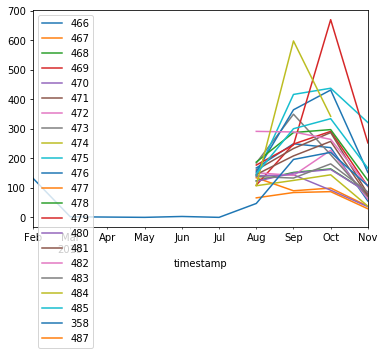

In [43]:
df['times_accessed'][df.person == 466].resample('m').sum().plot()
df['times_accessed'][df.person == 467].resample('m').sum().plot()
df['times_accessed'][df.person == 468].resample('m').sum().plot()
df['times_accessed'][df.person == 469].resample('m').sum().plot()
df['times_accessed'][df.person == 470].resample('m').sum().plot()
df['times_accessed'][df.person == 471].resample('m').sum().plot()
df['times_accessed'][df.person == 472].resample('m').sum().plot()
df['times_accessed'][df.person == 473].resample('m').sum().plot()
df['times_accessed'][df.person == 474].resample('m').sum().plot()
df['times_accessed'][df.person == 475].resample('m').sum().plot()
df['times_accessed'][df.person == 476].resample('m').sum().plot()
df['times_accessed'][df.person == 477].resample('m').sum().plot()
df['times_accessed'][df.person == 478].resample('m').sum().plot()
df['times_accessed'][df.person == 479].resample('m').sum().plot()
df['times_accessed'][df.person == 480].resample('m').sum().plot()
df['times_accessed'][df.person == 481].resample('m').sum().plot()
df['times_accessed'][df.person == 482].resample('m').sum().plot()
df['times_accessed'][df.person == 483].resample('m').sum().plot()
df['times_accessed'][df.person == 484].resample('m').sum().plot()
df['times_accessed'][df.person == 485].resample('m').sum().plot()
df['times_accessed'][df.person == 358].resample('m').sum().plot()
df['times_accessed'][df.person == 487].resample('m').sum().plot()
plt.legend(['466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478','479', '480', '481', '482', '483', '484', '485', '358', '487'])

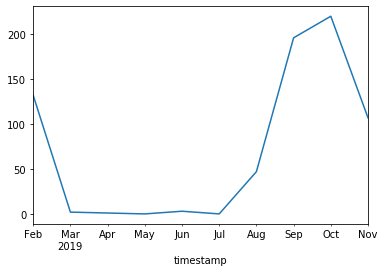

In [44]:
df['times_accessed'][df.person == 358].resample('m').sum().plot()

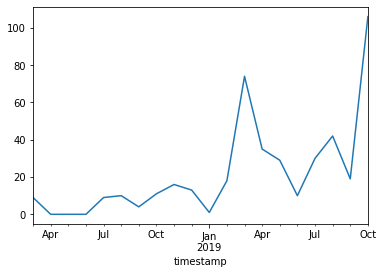

In [45]:
df['times_accessed'][df.person == 146].resample('m').sum().plot()

In [46]:
set(df.group)

{0.0,
 1.0,
 2.0,
 4.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 51.0,
 52.0}

In [47]:
lst = df[df.group== "34.0"]
lst

,http,person,group,ipaddress,times_accessed
timestamp,,,,,


In [51]:
number = 34

for number in lst:
    
    df[df.person == f'{number}'].resample('m').sum().plot()

TypeError: Empty 'DataFrame': no numeric data to plot

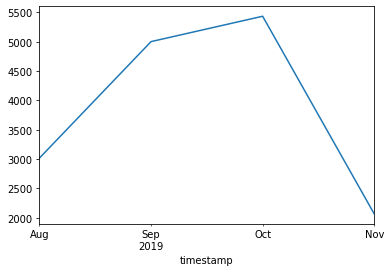

In [49]:
df['times_accessed'][df.group == 34].resample('m').sum().plot()